IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import time
import re

DOWNLOADING NLTK (Natural Language Toolkit)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

READ DATASET

In [ ]:
train_set = pd.read_csv('Corona_NLP_train.csv',encoding="latin1")
test_set = pd.read_csv('Corona_NLP_test.csv',encoding="latin1")

In [ ]:
train_set.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


DROP THE UNRELEVANT FEATURE IN DATASET

In [ ]:
unrelevant_features = ["UserName","ScreenName","Location","TweetAt"]

train_set.drop(unrelevant_features,inplace=True,axis=1)
test_set.drop(unrelevant_features,inplace=True,axis=1)
train_set.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


COUNTING SENTIMENT IN DATASET

In [ ]:
train_set["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

MAKE AN OBJECT THAT CONTAIN POSITIVE AND EXTREMELY POSITIVE SENTIMENT

In [ ]:
positives = train_set[(train_set["Sentiment"] == "Positive") | (train_set["Sentiment"] == "Extremely Positive")]
positives_test = test_set[(test_set["Sentiment"] == "Positive") | (test_set["Sentiment"] == "Extremely Positive")]
print(positives["Sentiment"].value_counts())
positives.head()

Positive              11422
Extremely Positive     6624
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive


MAKE AN OBJECT THAT CONTAIN NEGATIVE AND EXTREMELY NEGATIVE SENTIMENT

In [ ]:
negatives = train_set[(train_set["Sentiment"] == "Negative") | (train_set["Sentiment"] == "Extremely Negative")]
negatives_test = test_set[(test_set["Sentiment"] == "Negative") | (test_set["Sentiment"] == "Extremely Negative")]
print(negatives["Sentiment"].value_counts())
negatives.head()

Negative              9917
Extremely Negative    5481
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
9,"For corona prevention,we should stop to buy th...",Negative
20,with 100 nations inficted with covid 19 th...,Extremely Negative
24,@10DowningStreet @grantshapps what is being do...,Negative
26,In preparation for higher demand and a potenti...,Negative


MAKE AN OBJECT THAT CONTAIN NEUTRAL SENTIMENT

In [ ]:
neutrals = train_set[train_set["Sentiment"] == "Neutral"]
neutrals_test = test_set[test_set["Sentiment"] == "Neutral"]
print(neutrals["Sentiment"].value_counts())
neutrals.head()

Neutral    7713
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,Was at the supermarket today. Didn't buy toile...,Neutral
10,All month there hasn't been crowding in the su...,Neutral
16,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral


LABELLING THE SENTIMENT INTO NUMBER

- for positive the label is 2
- for negative is 0
- for neutral is 1

In [ ]:
import warnings as wrn
wrn.filterwarnings('ignore')

negatives["Sentiment"] = 0 
negatives_test["Sentiment"] = 0

positives["Sentiment"] = 2
positives_test["Sentiment"] = 2

neutrals["Sentiment"] = 1
neutrals_test["Sentiment"] = 1

negatives.head()

,OriginalTweet,Sentiment
4,"Me, ready to go at supermarket during the #COV...",0
9,"For corona prevention,we should stop to buy th...",0
20,with 100 nations inficted with covid 19 th...,0
24,@10DowningStreet @grantshapps what is being do...,0
26,In preparation for higher demand and a potenti...,0


CONCATENATE OR JOINING THE OBJECT AND MAKING DATAFRAME
TO CONTAIN THE OBJECT

In [ ]:
data = pd.concat([positives,
                  positives_test,
                  neutrals,
                  neutrals_test,
                  negatives,
                  negatives_test
                 ],axis=0)

data.reset_index(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          44955 non-null  int64 
 1   OriginalTweet  44955 non-null  object
 2   Sentiment      44955 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


RANDOMING TEXT

In [ ]:
import random
for i in range(1,10):
    random_ind = random.randint(0,len(data))
    print(str(data["OriginalTweet"][random_ind]),end="\nLabel: ")
    print(str(data["Sentiment"][random_ind]),end="\n\n")

One of the country's largest pork processing facilities is closing until further notice as employees fall ill with Covid-19. The closure puts the country's meat supply at risk, said the CEO of Smithfield, which operates the plant. https://t.co/BCadI0paBc
Label: 0

@AdamBandt The rationing on essential groceries like milk, rice, pasta, and flour, etc. means, supermarket trips/week, will increase considerably. This situation will lead to overcrowding in the supermarkets, &amp; will add to the current exponential spre
Label: 2

Thanks to everyone who donated their empty #toiletpaper rolls for my #easter bonfire last night. We've been here 17hrs &amp; only have 675,000 left to get through. #bonfires #coronavirus #IsolationLife https://t.co/zMIaEcby1V
Label: 2

Just me, headed off to the grocery store. #coronavirus https://t.co/tFiTPZPm41
Label: 1

@askboomer1949 You can help the grocery store people by maintaining #SocialDistancing and if you have a mask, wear it when you go to the grocery

MAKE A FREQUENCY DISTRIBUTION FOR EVERY SENTIMENT

In [ ]:
positiveFD = nltk.FreqDist(word for text in data[data["Sentiment"] == 2]["OriginalTweet"] for word in text.lower().split())
negativeFD = nltk.FreqDist(word  for text in data[data["Sentiment"] == 0]["OriginalTweet"] for word in text.lower().split())
neutralDF = nltk.FreqDist(word  for text in data[data["Sentiment"] == 1]["OriginalTweet"] for word in text.lower().split())

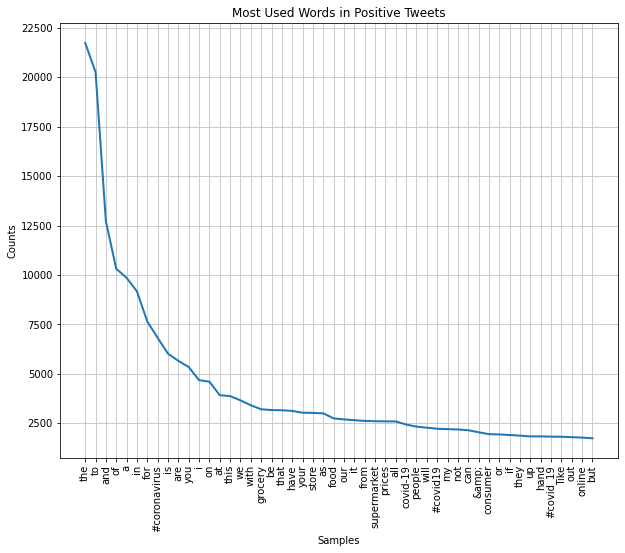

In [ ]:
plt.subplots(figsize=(10,8))
plt.title("Most Used Words in Positive Tweets")
positiveFD.plot(50)
plt.show()

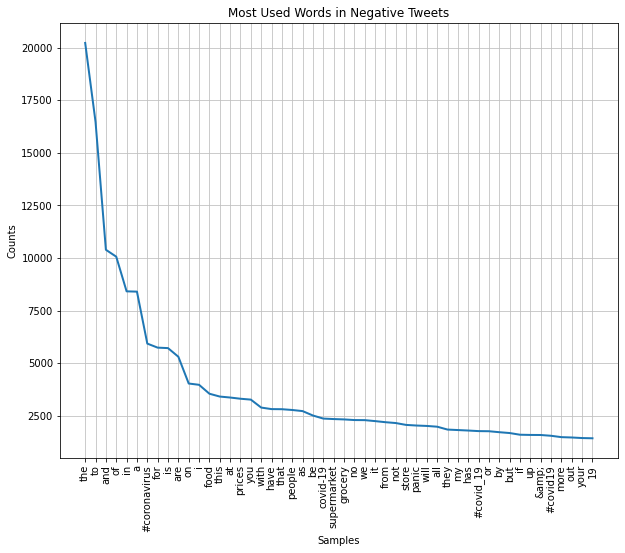

In [ ]:
plt.subplots(figsize=(10,8))
plt.title("Most Used Words in Negative Tweets")
negativeFD.plot(50)
plt.show()

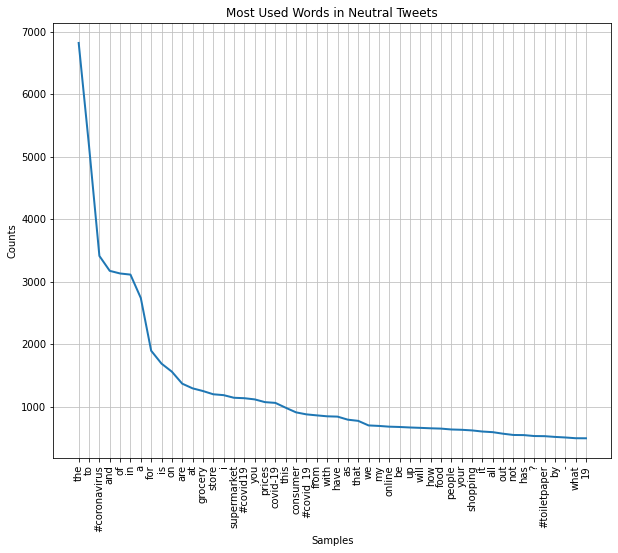

In [ ]:
plt.subplots(figsize=(10,8))
plt.title("Most Used Words in Neutral Tweets")
neutralDF.plot(50)
plt.show()

PREPROCESSING THE DATA

- the strings in data(dataframe) are going to be cleaned from links, special character, stopwords.
- the strings are going to be tokenize or lemmatization

In [ ]:
cleanedData = []

lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in data["OriginalTweet"]:
    
    # cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # removing stopwords
    text = [word for word in text if word not in swords]
    
    # Joining
    text = " ".join(text)
    
    cleanedData.append(text)

SHOWING THE RESULT OF THE STRINGS AFTER PREPROCESS

In [ ]:
for i in range(0,5):
    print(cleanedData[i],end="\n\n")

advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order

coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak

food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral

news region first confirmed covid 19 case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report

cashier grocery store wa sharing insight covid 19 prove credibility commented civics class know talking



In [ ]:
vectorizer = CountVectorizer(max_features=10000)
BOW = vectorizer.fit_transform(cleanedData)

SPLITTING THE DATA INTO TRAIN AND TEST SET

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(BOW,np.asarray(data["Sentiment"]))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33716, 10000)
(11239, 10000)
(33716,)
(11239,)


IMPORTING SVC (Support Vector Classifier) FROM SCIKITLEARN LIBRARY

- the model are going to be fitted into training set
- and the process time for the model to fit into training set are 467.83
- and the accuracy score is 77.20%

In [ ]:
from sklearn.svm import SVC
start_time = time.time()

model = SVC()
model.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting SVC took {} seconds".format(process_time))

Fitting SVC took 467.99 seconds


In [ ]:
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy of model is {}%".format(accuracy_score(y_test,predictions) * 100))

Accuracy of model is 77.54248598629772%


IMPORTING LOGISTIC REGRESSION FROM SCIKITLEARN LIBRARY

- the model are going to be fitted into training set
- and the process time for the model to fit into training set are 3.25
- and the accuracy score is 80%

In [ ]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()

model2 = LogisticRegression()
model2.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting LogisticRegression took {} seconds".format(process_time))

Fitting LogisticRegression took 3.25 seconds


In [ ]:
predictions = model2.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy of model is {}%".format(accuracy_score(y_test,predictions) * 100))

Accuracy of model is 80.22066020108551%
